# Novety : Data imbalance

import necessary library from sklearn,numpy and matplotlib

In [1]:
import io, os, sys, types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from models.novelty.nove import Imbalanced_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. import data and do normalization

In [2]:
obj=Imbalanced_data()

## 2.print the number of class 1 and number of class 0

In [3]:
obj.showImbalance()   

number of class 0 :23364
number of class 1 : 6636


## 3.Here,we define 4 classification model to fit imbalance and use a comparation which add class wight as a parameter
In this experiment, only use the default parameter without hyperparameter search due to we don't want the model belong to same classifier have different parameter except class_weight.


In [4]:
obj.showImbalance()   

number of class 0 :23364
number of class 1 : 6636


call the function above

In [5]:
obj.testdt()
obj.svctest()
obj.lgtest()
obj.rftest()

dtc balanced accuray: 76.00%  dtc imbalanced accuray: 82.61%
dtc balanced precision: 45.79%  dtc imbalanced precision: 68.13%
dtc balanced recall: 61.45%  dtc imbalanced recall: 36.35%
svc balanced accuray: 76.11%  svc imbalanced accuray: 82.48%
svc balanced precision: 45.96%  svc imbalanced precision: 69.19%
svc balanced recall: 61.31%  svc imbalanced recall: 33.86%


/home/hao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logistic balanced accuray: 61.19%  logistic imbalanced accuray: 81.65%
logistic balanced precision: 31.98%  logistic imbalanced precision: 73.95%
logistic balanced recall: 70.96%  logistic imbalanced recall: 23.00%


/home/hao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random forest accuray: 81.06%  random forest imbalanced accuray: 80.90%
random forest balanced precision: 63.35%  random forest imbalanced precision: 61.09%
random forest balanced recall: 28.90%  random forest imbalanced recall: 31.48%


base on the result we can get the data for plot,just for convient we define collected in the matrix

In [6]:
testing_rs = np.array([[76, 45.79, 61.45],
                       [82.61, 68.13, 36.35],
                       [76.11, 45.96, 61.31],
                       [82.48, 69.19, 33.86],
                       [61.19, 31.98, 70.96],
                       [81.65, 73.95, 23],
                       [81.06, 63.35, 28.90],
                       [80.9, 61.09, 31.48]
                       ]).transpose()

# print accuracy,precision,recall with bar chart

          accuracy  precision  recall
DT(bal)      76.00      45.79   61.45
DT(im)       82.61      68.13   36.35
SVC(bal)     76.11      45.96   61.31
SVC(im)      82.48      69.19   33.86
lg(bal)      61.19      31.98   70.96
lg(im)       81.65      73.95   23.00
rf(bal)      81.06      63.35   28.90
rf(im)       80.90      61.09   31.48


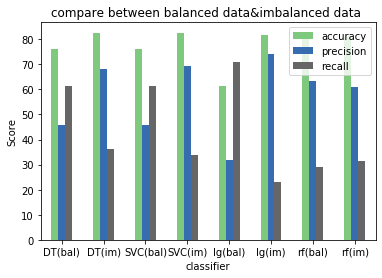

In [7]:
index = ["DT(bal)","DT(im)" ,"SVC(bal)","SVC(im)", "lg(bal)",  "lg(im)",\
         "rf(bal)","rf(im)"]
lables = ["accuracy", "precision", "recall"]

def gen_rs(testing_rs, index, lables):
    dic = {}
    for i in range(testing_rs.shape[0]):
        dic[lables[i]] = testing_rs[i, :]
    df = pd.DataFrame(dic, index=index, dtype=np.float)
    print(df)
    return df

def plot_bar(df):
    ax = df.plot.bar(rot=0, colormap=plt.cm.Accent, title="compare between balanced data&imbalanced data ")
    ax.set_ylabel("Score")
    ax.set_xlabel("classifier")
    fig = ax.get_figure()
    fig.savefig("bal&im.png")
    

df = gen_rs(testing_rs, index, lables)

plot_bar(df)